In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch, add_image
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from matplotlib.patheffects import Stroke, Normal, withStroke
import matplotlib.patches as patches
from matplotlib import rcParams
import matplotlib.pyplot as plt

En este ejemplo se utilizan los datos de [StatsBomb](https://statsbomb.com/es/) mediante la libreria [statsbombpy](https://github.com/statsbomb/statsbombpy). Como se ve en el siguiente recuadro donde se llama a la imágenes trataremos en la selección estadounidense femenina en el mundial, en concreto el de 2023 donde resultaron campeonas

In [2]:
path='C:\\Users\\lal99\\PROYECTOS\\FUTBOL\\LOGOS\\'
uswnt = plt.imread(path+"United_States_women's_national_soccer_team_logo.png")
worldcup=nwsl = plt.imread(path+"FIFA_Women's_World_Cup_2019.png")
logo= plt.imread(path+"StatsBomb.png")

In [3]:
free_comps=sb.competitions()
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [4]:
# Con este comando se elige la competición que se desea

mundial_2019=sb.matches(competition_id=72, season_id=30)

In [5]:
# Con este comando miran las columnas que existen en este conjunto de partidos

mundial_2019.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [6]:
# Con este comando se miran las columnas de las acciones que existen en un partido

sb.events(match_id=mundial_2019['match_id'][0]).columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_height', 'pass_inswinging'

In [7]:
# Se selecionan los partidos del equipo que interesan, hay que tener en cuenta que no 
# siempre juegan de locales por lo que hay que considerarlos todos

matches_usa=mundial_2019[(mundial_2019['home_team']=="United States Women's")|(mundial_2019['away_team']=="United States Women's")]

En este ejemplo se van a representar los tiros, para ello habra que localizarlos

In [8]:
usa = pd.DataFrame()
match_ids = list(matches_usa.match_id.values)
for match in match_ids:
    partido = sb.events(match_id=match)
    tiros = partido[partido['type'] == 'Shot']
    usa = pd.concat([usa,tiros])

In [9]:
usa.shape

(177, 103)

In [10]:
usa.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,foul_committed_penalty,foul_won_penalty,miscontrol_aerial_won,pass_miscommunication,pass_no_touch,injury_stoppage_in_chain,clearance_other,goalkeeper_shot_saved_off_target,shot_saved_off_target,pass_deflected
3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Ahora se separa la localización en 3

usa[['end_x', 'end_y', 'end_z']] = usa.shot_end_location.apply(pd.Series)
usa

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,pass_miscommunication,pass_no_touch,injury_stoppage_in_chain,clearance_other,goalkeeper_shot_saved_off_target,shot_saved_off_target,pass_deflected,end_x,end_y,end_z
3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.3,44.2,NaN
3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.3,41.9,2.0
3252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.7,42.7,NaN
3253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.5,4.7
3254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,37.3,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,39.1,3.5
2698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,47.1,1.4
2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,45.1,5.2
2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,36.3,0.2


In [12]:
# Seleccionando todos los tiros de las estadounidenses

tiros_usa = usa[(usa['team'] == "United States Women's") & (usa['shot_outcome'] != 'Off T') & (usa['end_z'].isna() == False)].reset_index(drop=True)
tiros_usa.shape

(58, 106)

In [13]:
tiros_usa[['end_y', 'end_z']].describe()

,end_y,end_z
count,58.000000,58.000000
mean,39.379310,0.968966
std,2.646796,0.761395
min,35.500000,0.100000
25%,37.225000,0.225000
50%,38.150000,0.800000
75%,41.825000,1.600000
max,44.100000,3.000000


<Axes: >

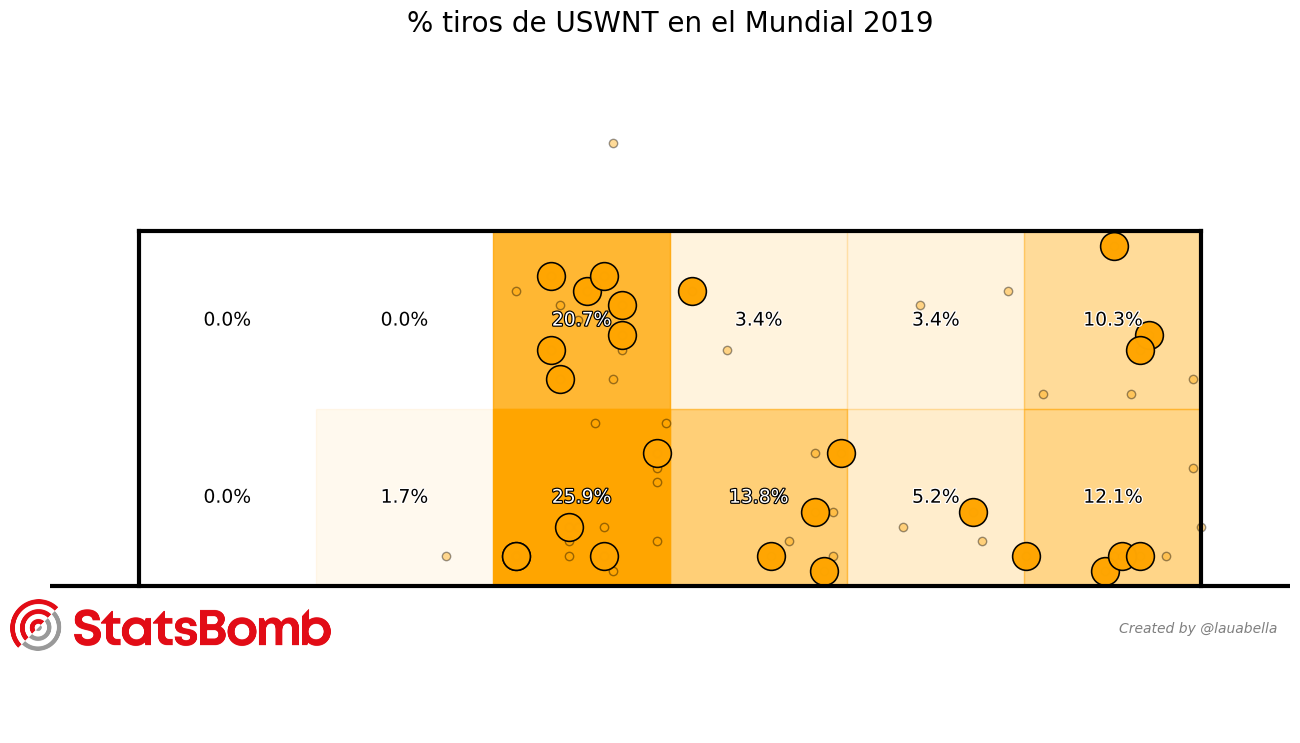

In [14]:
# Ahora se grafica

fig, ax = plt.subplots(figsize=(16,9))

width = 24
height = 8

increment_x = int(width / 6)
increment_y = int(height / 2)

tiros_usa['goalMouthY'] = tiros_usa['end_y'] - 32
tiros_usa['goalMouthY'] = [(x*width)/12.1 for x in tiros_usa['goalMouthY']]
tiros_usa['goalMouthZ'] = [(x*height)/2.4 for x in tiros_usa['end_z']]
tiros_usa[['goalMouthY', 'goalMouthZ']]

# Porteria

ax.plot([0,0],[0,height], color = 'black', lw = 3)
ax.plot([width,width],[0,height], color = 'black', lw = 3)

ax.plot([0,width],[height,height], color = 'black', lw = 3)

# Logica para zonas

bins_y = range(0, width + 1, increment_x)
bins_z = range(0, height + 1, increment_y)
tiros_usa['bins_y'] = pd.cut(tiros_usa['goalMouthY'], bins_y)
tiros_usa['bins_z'] = pd.cut(tiros_usa['goalMouthZ'], bins_z)
tiros_usa['shot_aux'] = 1

data_bins = tiros_usa[['team','bins_y','bins_z','shot_aux']].groupby(['bins_y','bins_z','team'])['shot_aux'].sum().reset_index()
total_shots = tiros_usa.groupby(['team'])['shot_aux'].sum().reset_index()
total_shots.columns = ['team','total']
data_bins = pd.merge(data_bins,total_shots, how = 'left', on = 'team')
data_bins['shot_pct'] = data_bins['shot_aux']/data_bins['total']
data_bins = data_bins.sort_values(by = ['bins_y', 'bins_z'])
ax.axis('equal')

data = list(data_bins['shot_pct'])
max_data = max(data)
scaled_data = [x/max_data for x in data]

i = 0 
x = 0
while x < width:
    for y in range(0, height, increment_y):
        rect = patches.Rectangle(
                (x, y),  # posicion inicial abajo izquierda (x,y)
                increment_x,  # ancho
                increment_y,  # alto
                ec='orange',
                fc='orange',
                alpha = scaled_data[i], # transparencia
                zorder=-1
                )
    
        ax.add_patch(rect)
        
        # Anotado el contador (i) y escogiendo el color segun el valor
        
        if scaled_data[i] < .5:
            color_text = 'black'
            fore_color ='white'
        else:
            color_text = 'white'
            fore_color = 'black'
        label_ = ax.text(
                    x = x + increment_x/2, y = y + increment_y/2,
                    s = f'{data[i]:.1%}', # <----- the data label
                    color = color_text,
                    va = 'center',
                    ha = 'center',
                    size = 13.5
                )
        
        # Eligiendo la ruta para asegurar la adaptabilidad
        
        label_.set_path_effects([Stroke(linewidth=1.7, foreground=fore_color), Normal()])
    
        i += 1
    
    # Una vez que se han establecido los rectangulos de arrriba y abajo bien
    
    x = x + increment_x

ax.set_xlim(-2,width + 2)
ax.set_ylim(-2,height + 3)
ax.set_axis_off()
ax.plot([-2,width + 2],[0,0], color = 'black', marker = 'None', lw = 3, zorder = 3)

ax.scatter(tiros_usa['goalMouthY'], tiros_usa['goalMouthZ'], color = "orange", alpha = 0.4, ec='black')
goles_tiros_usa = tiros_usa[tiros_usa['shot_outcome'] == 'Goal']
ax.scatter(goles_tiros_usa['goalMouthY'], goles_tiros_usa['goalMouthZ'], ec = "black", color = "orange", alpha = 0.99, lw=1.15, s=400)
plt.title('% tiros de USWNT en el Mundial 2019', fontsize=20)

# Watermark y el logo de StatsBomb

plt.text(0.99, 0.14, 'Created by @lauabella', fontsize=10, fontstyle='italic', alpha=0.5, 
             ha='right', va='bottom', transform=plt.gca().transAxes)
    
add_image(logo, fig, left=0.1, bottom= 0.13, width=0.2, height=0.2)

<Axes: >

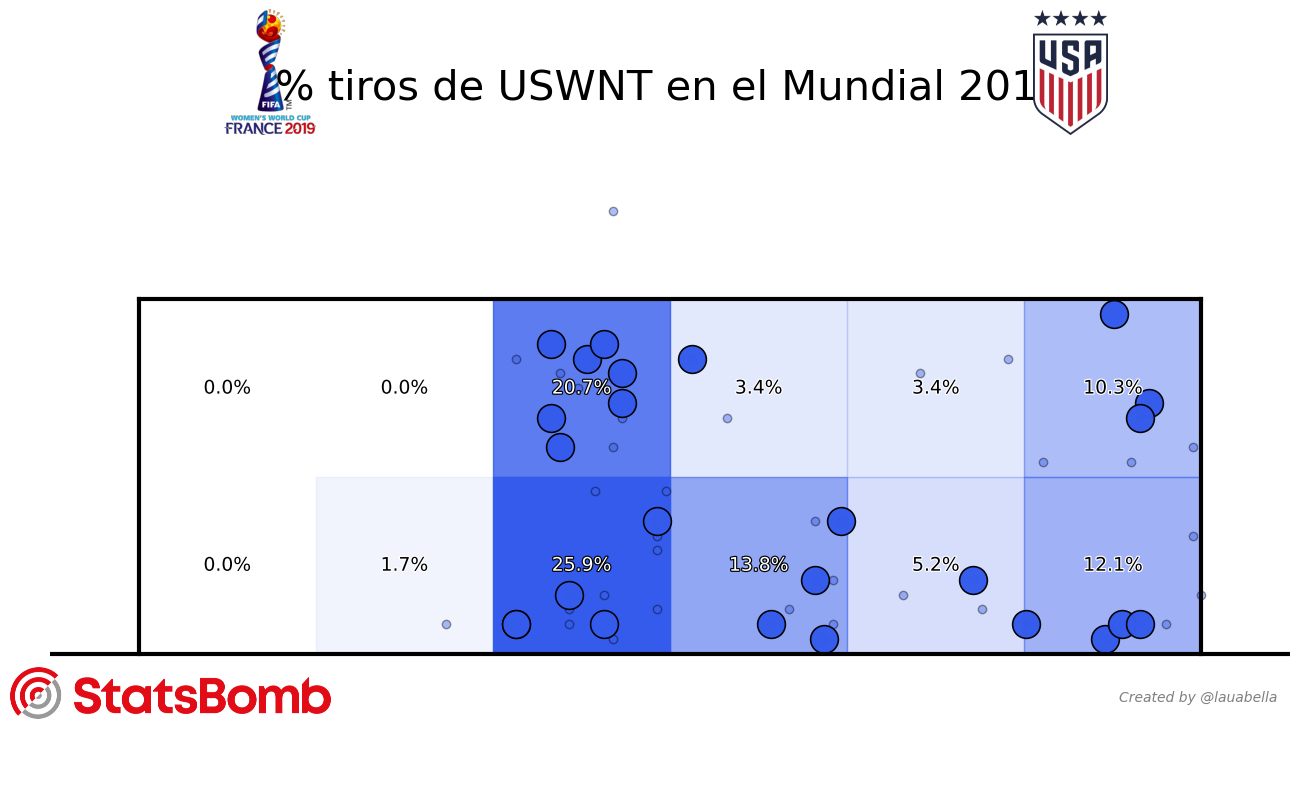

In [15]:
# Ahora se grafica

fig, ax = plt.subplots(figsize=(16,9))

width = 24
height = 8

increment_x = int(width / 6)
increment_y = int(height / 2)

tiros_usa['goalMouthY'] = tiros_usa['end_y'] - 32
tiros_usa['goalMouthY'] = [(x*width)/12.1 for x in tiros_usa['goalMouthY']]
tiros_usa['goalMouthZ'] = [(x*height)/2.4 for x in tiros_usa['end_z']]
tiros_usa[['goalMouthY', 'goalMouthZ']]

# Porteria

ax.plot([0,0],[0,height], color = 'black', lw = 3)
ax.plot([width,width],[0,height], color = 'black', lw = 3)

ax.plot([0,width],[height,height], color = 'black', lw = 3)

# Logica para zonas

bins_y = range(0, width + 1, increment_x)
bins_z = range(0, height + 1, increment_y)
tiros_usa['bins_y'] = pd.cut(tiros_usa['goalMouthY'], bins_y)
tiros_usa['bins_z'] = pd.cut(tiros_usa['goalMouthZ'], bins_z)
tiros_usa['shot_aux'] = 1

data_bins = tiros_usa[['team','bins_y','bins_z','shot_aux']].groupby(['bins_y','bins_z','team'])['shot_aux'].sum().reset_index()
total_shots = tiros_usa.groupby(['team'])['shot_aux'].sum().reset_index()
total_shots.columns = ['team','total']
data_bins = pd.merge(data_bins,total_shots, how = 'left', on = 'team')
data_bins['shot_pct'] = data_bins['shot_aux']/data_bins['total']
data_bins = data_bins.sort_values(by = ['bins_y', 'bins_z'])
ax.axis('equal')

data = list(data_bins['shot_pct'])
max_data = max(data)
scaled_data = [x/max_data for x in data]

i = 0 
x = 0
while x < width:
    for y in range(0, height, increment_y):
        rect = patches.Rectangle(
                (x, y),  # posicion inicial abajo izquierda (x,y)
                increment_x,  # ancho
                increment_y,  # alto
                ec='#345beb',
                fc='#345beb',
                alpha = scaled_data[i], # transparencia
                zorder=-1
                )
    
        ax.add_patch(rect)
        
        # Anotado el contador (i) y escogiendo el color segun el valor
        
        if scaled_data[i] < .5:
            color_text = 'black'
            fore_color ='white'
        else:
            color_text = 'white'
            fore_color = 'black'
        label_ = ax.text(
                    x = x + increment_x/2, y = y + increment_y/2,
                    s = f'{data[i]:.1%}', # <----- the data label
                    color = color_text,
                    va = 'center',
                    ha = 'center',
                    size = 13.5
                )
        
        # Eligiendo la ruta para asegurar la adaptabilidad
        
        label_.set_path_effects([Stroke(linewidth=1.7, foreground=fore_color), Normal()])
    
        i += 1
    
    # Una vez que se han establecido los rectangulos de arrriba y abajo bien
    
    x = x + increment_x

ax.set_xlim(-2,width + 2)
ax.set_ylim(-2,height + 3)
ax.set_axis_off()
ax.plot([-2,width + 2],[0,0], color = 'black', marker = 'None', lw = 3, zorder = 3)

ax.scatter(tiros_usa['goalMouthY'], tiros_usa['goalMouthZ'], color = "#345beb", alpha = 0.4, ec='black')
goles_tiros_usa = tiros_usa[tiros_usa['shot_outcome'] == 'Goal']
ax.scatter(goles_tiros_usa['goalMouthY'], goles_tiros_usa['goalMouthZ'], ec = "black", color = "#345beb", alpha = 0.99, lw=1.15, s=400)
plt.title('% tiros de USWNT en el Mundial 2019', fontsize=30)

# Watermark y el logo de StatsBomb

plt.text(0.99, 0.14, 'Created by @lauabella', fontsize=10, fontstyle='italic', alpha=0.5, 
             ha='right', va='bottom', transform=plt.gca().transAxes)
    
add_image(logo, fig, left=0.1, bottom= 0.13, width=0.2, height=0.2)


# Se añade el logo del mundial y de la selección

add_image(worldcup, fig, left=0.20, bottom=0.85, width=0.125, height=0.14)
add_image(uswnt, fig, left=0.70, bottom=0.85, width=0.125, height=0.14)